In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**
Abalone is a type of consumable snail whose price varies as per its age. The aim is to predict the age of abalone from physical measurements. The age of abalone is traditionally determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope — a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [2]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=column_names)






Let’s now see the type and name of the features:

    Sex: This is the gender of the abalone and has categorical value (M, F or I).
    Length: The longest measurement of the abalone shell in mm. Continuous numeric value.
    Diameter: The measurement of the abalone shell perpendicular to length in mm. Continuous numeric value.
    Height: Height of the shell in mm. Continuous numeric value. Whole Weight : Weight of the abalone in grams. Continuous numeric value.
    Shucked Weight: Weight of just the meat in the abalone in grams. Continuous numeric value.
    Viscera Weight: Weight of the abalone after bleeding in grams. Continuous numeric value.
    Shell Weight: Weight of the abalone after being dried in grams. Continuous numeric value.
    Rings: This is the target, that is the feature that we will train the model to predict. As mentioned earlier, we are interested in the age of the abalone and it has been established that number of rings + 1.5 gives the age. Discrete numeric value.




In [3]:
type(abalone_data)

pandas.core.frame.DataFrame

In [4]:
abalone_data.shape

(4177, 9)

In [5]:
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


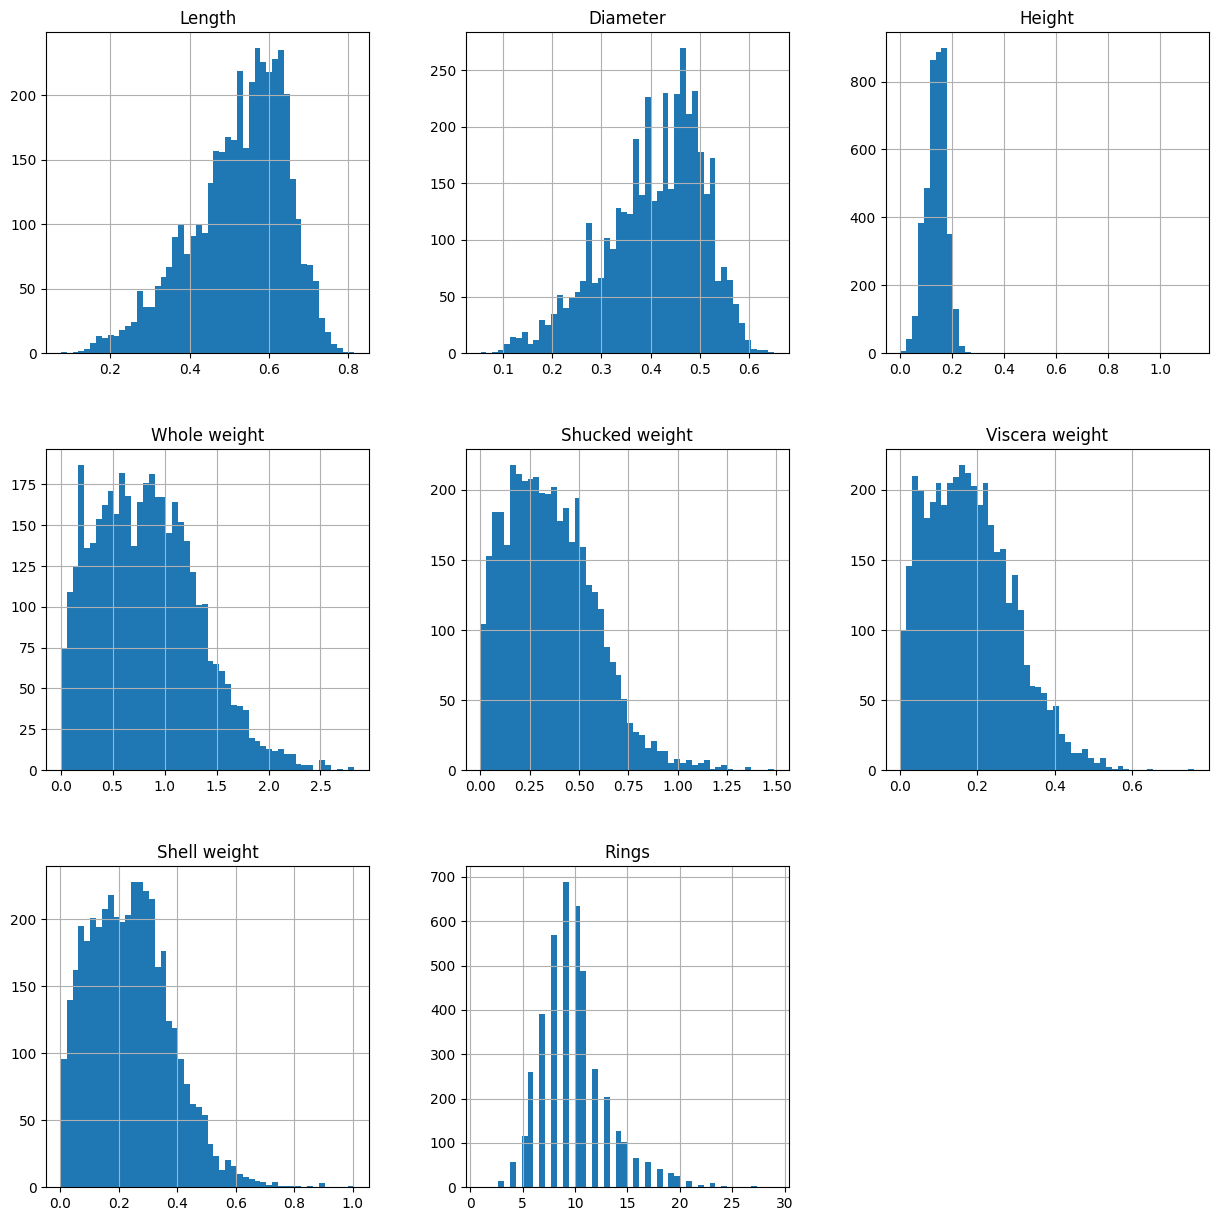

In [6]:
abalone_data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

<Figure size 640x480 with 0 Axes>

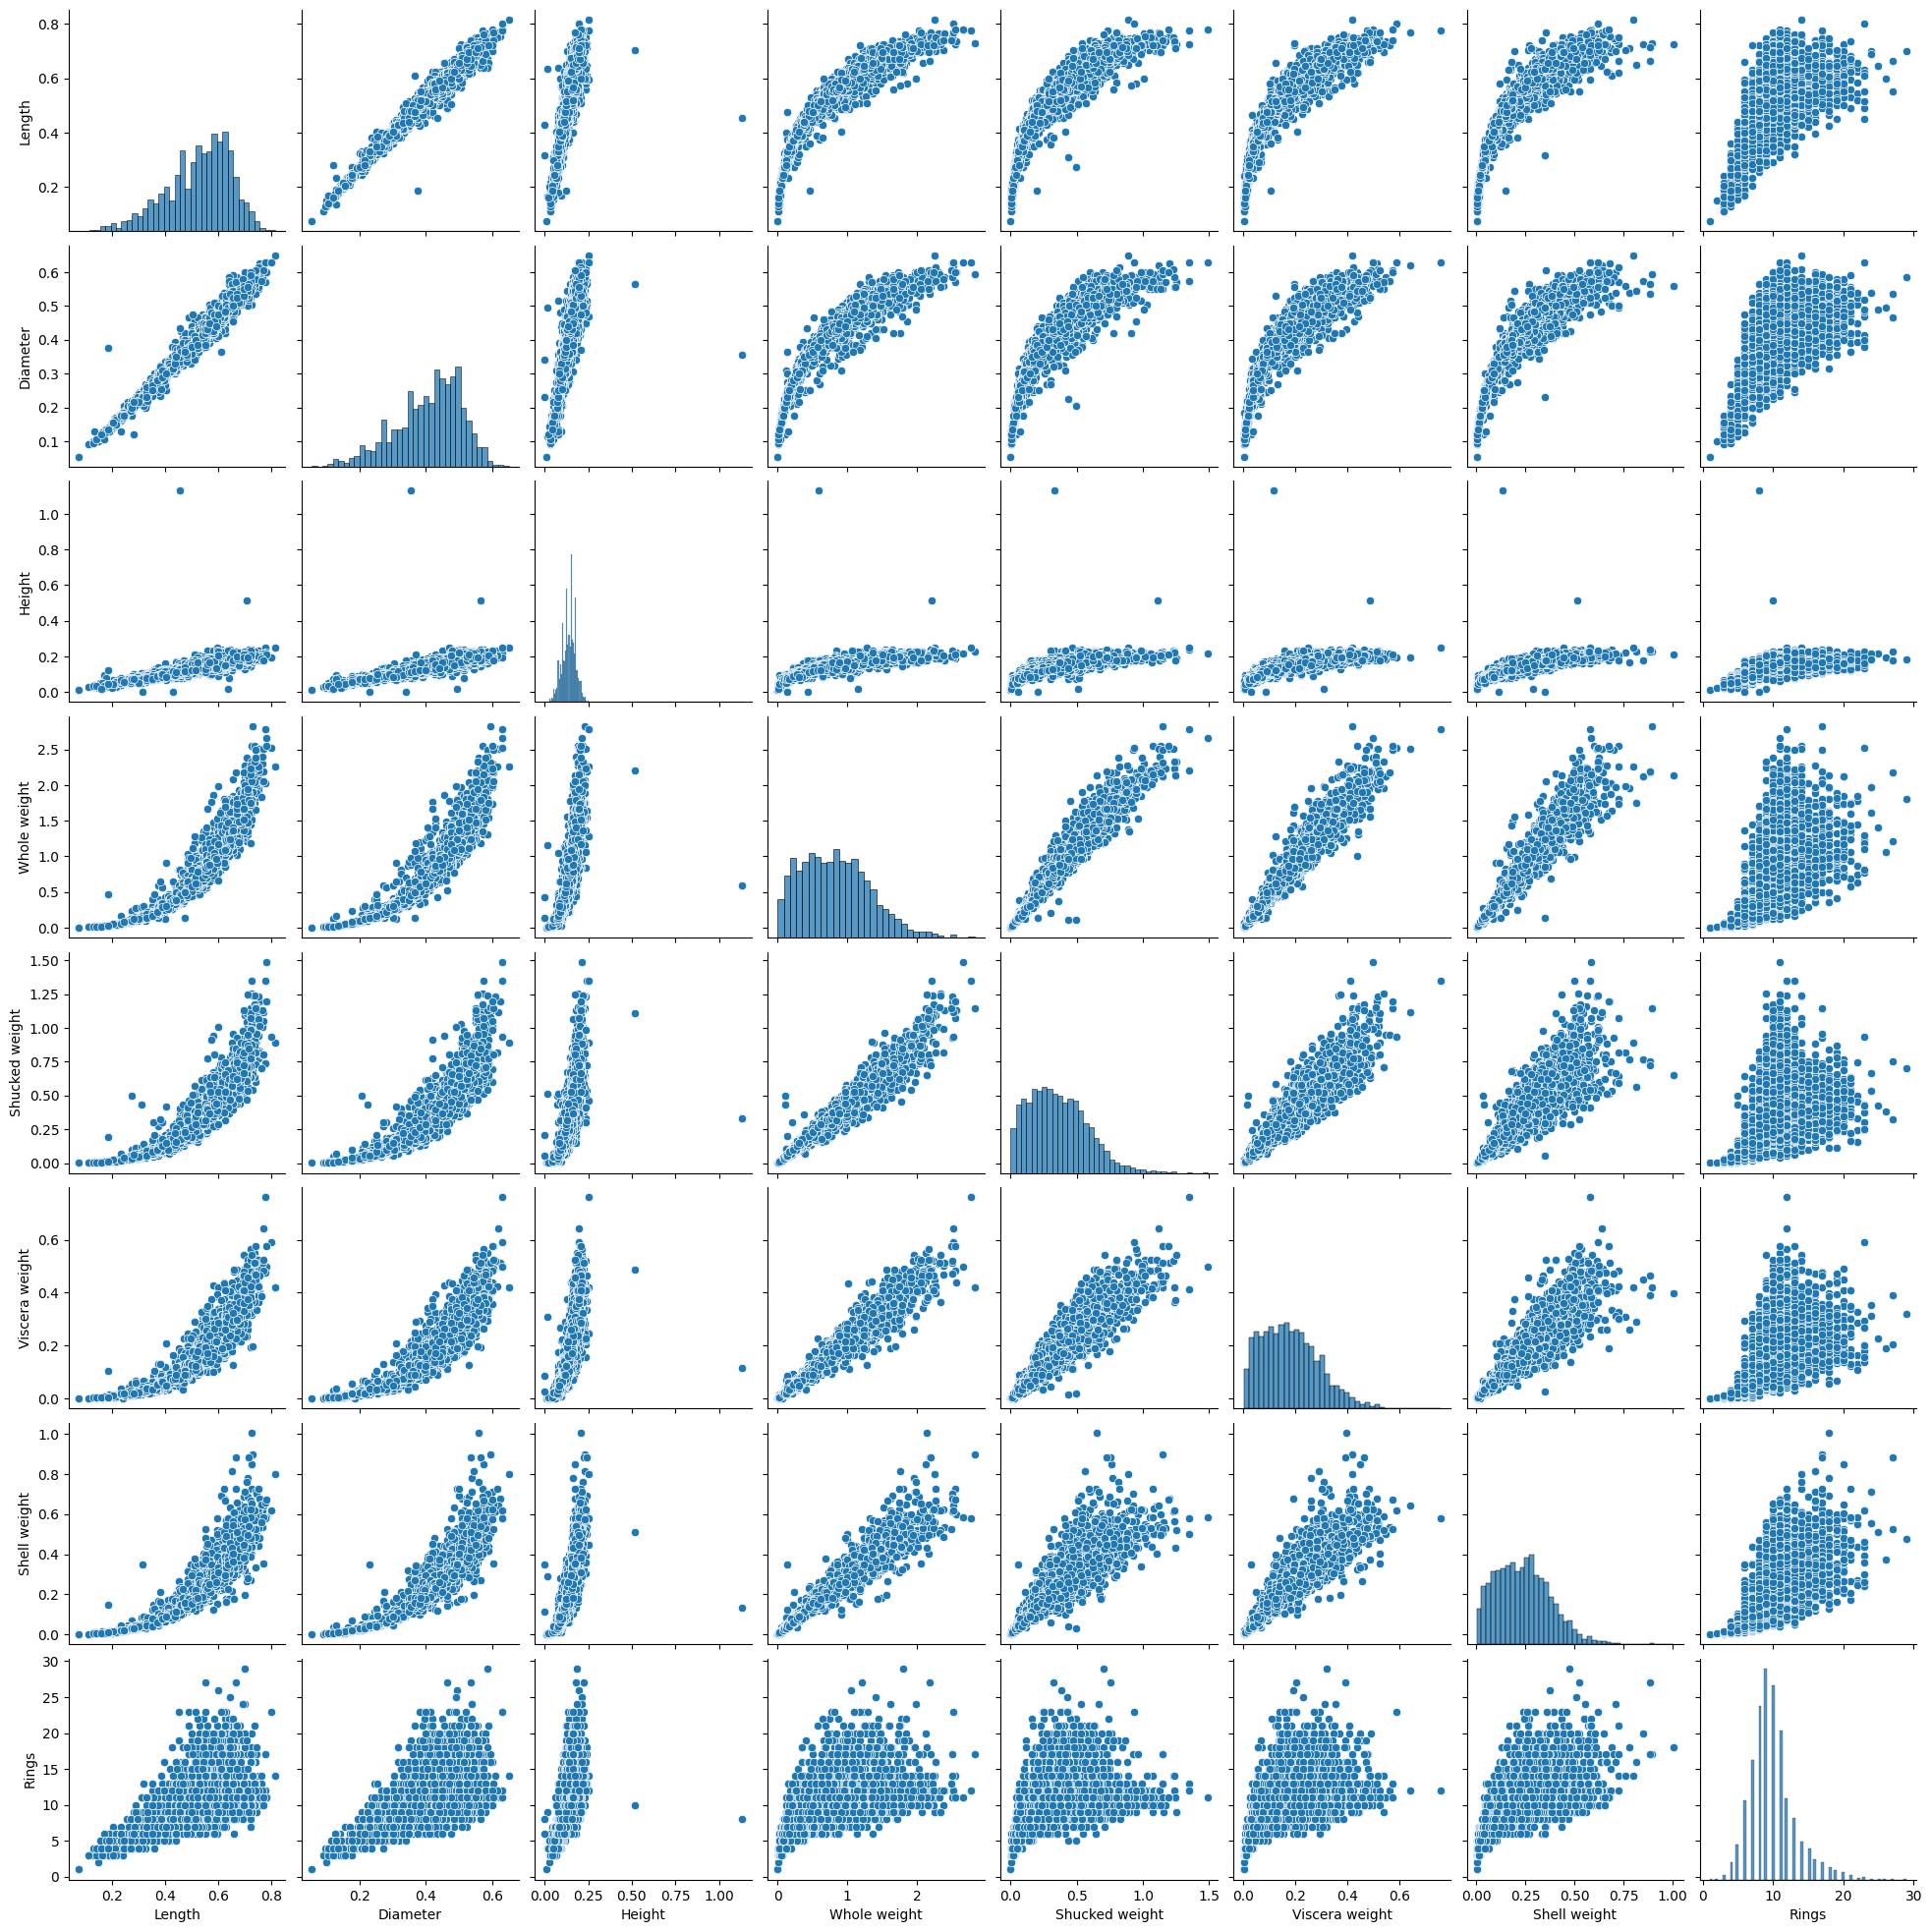

In [7]:
plt.figure()
sns.pairplot(abalone_data, diag_kind="hist")
plt.show()

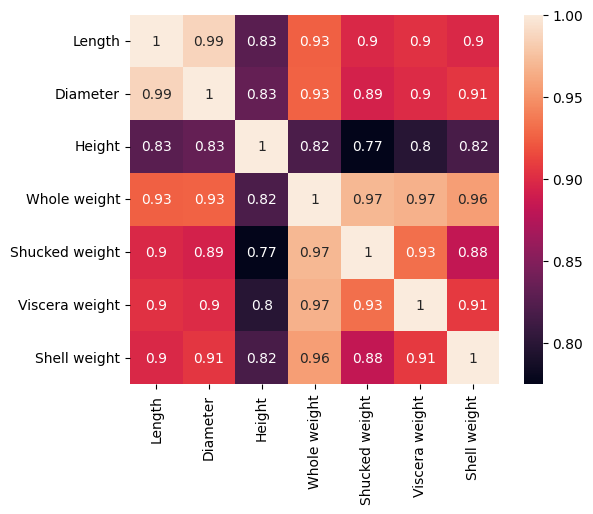

In [8]:
plt.figure()
sns.heatmap(abalone_data.iloc[:, 1:-1].corr(),annot=True, square=True)
plt.show()

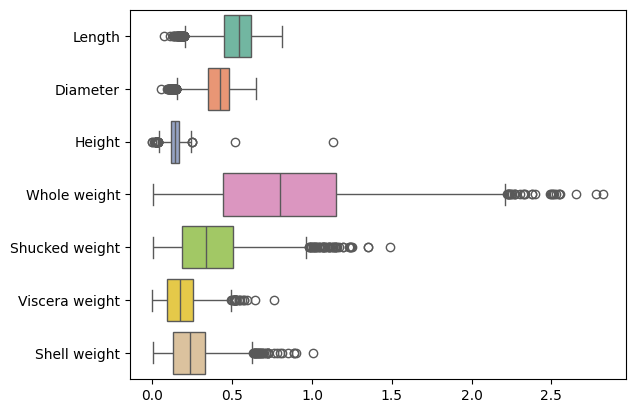

In [9]:
plt.figure()
sns.boxplot(data=abalone_data.iloc[:,:-1], orient="h", palette="Set2")
plt.show()

We find different features to be having different ranges through this box-plot, which indicates that scaling the features may be useful.

In [10]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From the information above, all features are continuous variables except for the Sex feature.

In [11]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000




The count row shows that there are no missing values.

However, in the Height feature, the minimum value is zero. This possibility calls for a missing value in the data and we will process the missing value.


Next, take a look at the target in this case in the Rings column

In [12]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [13]:
abalone_data['Rings'].value_counts().sort_index()

,count
Rings,
1,1
2,1
3,15
4,57
5,115
6,259
7,391
8,568
9,689


We can see that the target is 1 to 29 (but there is no 28), so the classification we are going to do is a multi-class classification.

# Missing values (or 0 values)

We first check how many missing values are in the Height feature and which class is it in

In [14]:
(abalone_data['Height'] == 0).sum()

np.int64(2)

In [15]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


The number of missing values is 2 and is in the infant sex. Then we change the value 0 to null. We will fill in the missing value with the average Height feature for the infant gender

In [16]:
means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc={'Height':np.mean})
means

<ipython-input-16-852abc7c076e>:1: FutureWarning: The provided callable <function mean at 0x7e30b7be93a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc={'Height':np.mean})


,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


So we will fill in the missing value with 0.107996. (Will do this in a little while during preprocessing)

## Storing data in the form of X and **y**

In [17]:
X = abalone_data.iloc[:,:-1]
y = abalone_data.iloc[:,-1]

In [18]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Splitting data into train and test sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Pipelining

We will use pipelines to perform preprocessing of the data, which will include: handling missing (or 0) values, scaling the features and handling the categorical feature (viz., sex in this case)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

Identifying numeric and categorical features (to be able to preprocess them differently.)

In [21]:
numeric_features = ['Length', 'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']
categorical_features = ["Sex"]

In [22]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=0, strategy="constant", fill_value=0.107996)),
           ("scaler", StandardScaler())]
)

In [23]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [25]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", DecisionTreeClassifier(max_depth=3, random_state=42))]
)

In [26]:
clf.fit(X_train,y_train)
print("model score: %0.3f" % clf.score(X_test, y_test))

model score: 0.245


In [27]:
y_pred = clf.predict(X_test)

Let us compare the actual and predicted values of y.

In [28]:
comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)

for each in comparison:
  print(each)

[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]
[7 8]
[5 8]
[ 9 11]
[8 9]
[5 4]
[10  7]
[9 7]
[10 17]
[10  7]
[7 7]
[7 7]
[7 5]
[8 8]
[9 9]
[10 10]
[10 10]
[4 5]
[11 15]
[ 8 10]
[10 14]
[9 8]
[4 4]
[10  9]
[11 13]
[7 7]
[8 7]
[7 8]
[10  9]
[7 8]
[10 11]
[ 8 15]
[ 8 12]
[ 8 17]
[10 16]
[10 11]
[ 8 11]
[9 8]
[10 10]
[10 11]
[7 6]
[10 13]
[7 7]
[ 9 13]
[11 20]
[ 8 12]
[9 7]
[5 8]
[ 9 10]
[7 7]
[7 7]
[10  9]
[9 9]
[ 9 11]
[7 8]
[7 7]
[11 12]
[11 13]
[10 17]
[8 8]
[11 12]
[8 9]
[11 17]
[10 10]
[8 6]
[ 8 11]
[8 8]
[10  8]
[8 9]
[10  8]
[8 8]
[10  8]
[5 6]
[7 7]
[10 13]
[ 8 11]
[7 6]
[10  9]
[11 12]
[4 5]
[7 6]
[ 9 11]
[ 8 11]
[9 8]
[7 7]
[10 16]
[5 8]
[ 8 11]
[9 8]
[10 18]
[10 11]
[10 12]
[ 8 14]
[10 12]
[10 11]
[5 6]
[10  9]
[7 7]
[7 6]
[ 7 11]
[10 11]
[11 11]
[11 12]
[ 8 20]
[ 9 10]
[10 14]
[11 10]
[10 10]
[10 12]
[5 4]
[ 8 12]
[7 7]
[10 13]
[7 6]
[8 8]
[10 17]
[10 15]
[10  9]
[10 11]
[7 7]
[10 11]
[10  8]
[9 7]
[8 7]
[10 10]
[11 11]
[10  9]
[ 8 10]
[8 9]
[7 8]
[11 16

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \n', cm)

Confusion matrix 
 [[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 14  0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0 28  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0 56 13 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 25 43 28 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 47 24 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 22 17 49 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 20 14 45 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 17  3 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  2 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

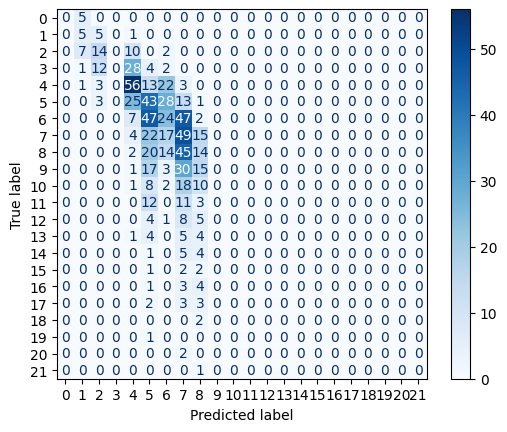

In [32]:
# visualizing the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


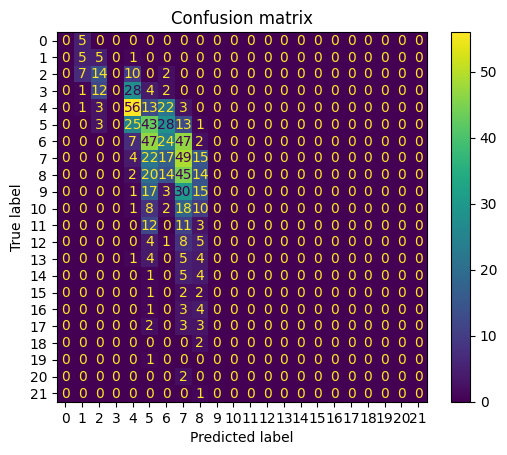

In [33]:
# visualizing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_predicted)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

In [34]:
from sklearn.metrics import classification_report

CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print(type(acc))
print('Accuracy of each fold ', list(acc*100))
print("Accuracy: {:.2f} %".format(acc.mean()*100))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


<class 'numpy.ndarray'>
Accuracy of each fold  [np.float64(27.46268656716418), np.float64(22.45508982035928), np.float64(23.952095808383234), np.float64(24.550898203592812), np.float64(24.251497005988025), np.float64(23.952095808383234), np.float64(25.449101796407188), np.float64(30.83832335329341), np.float64(26.34730538922156), np.float64(26.047904191616766)]
Accuracy: 25.53 %


# Visualizing the decision tree

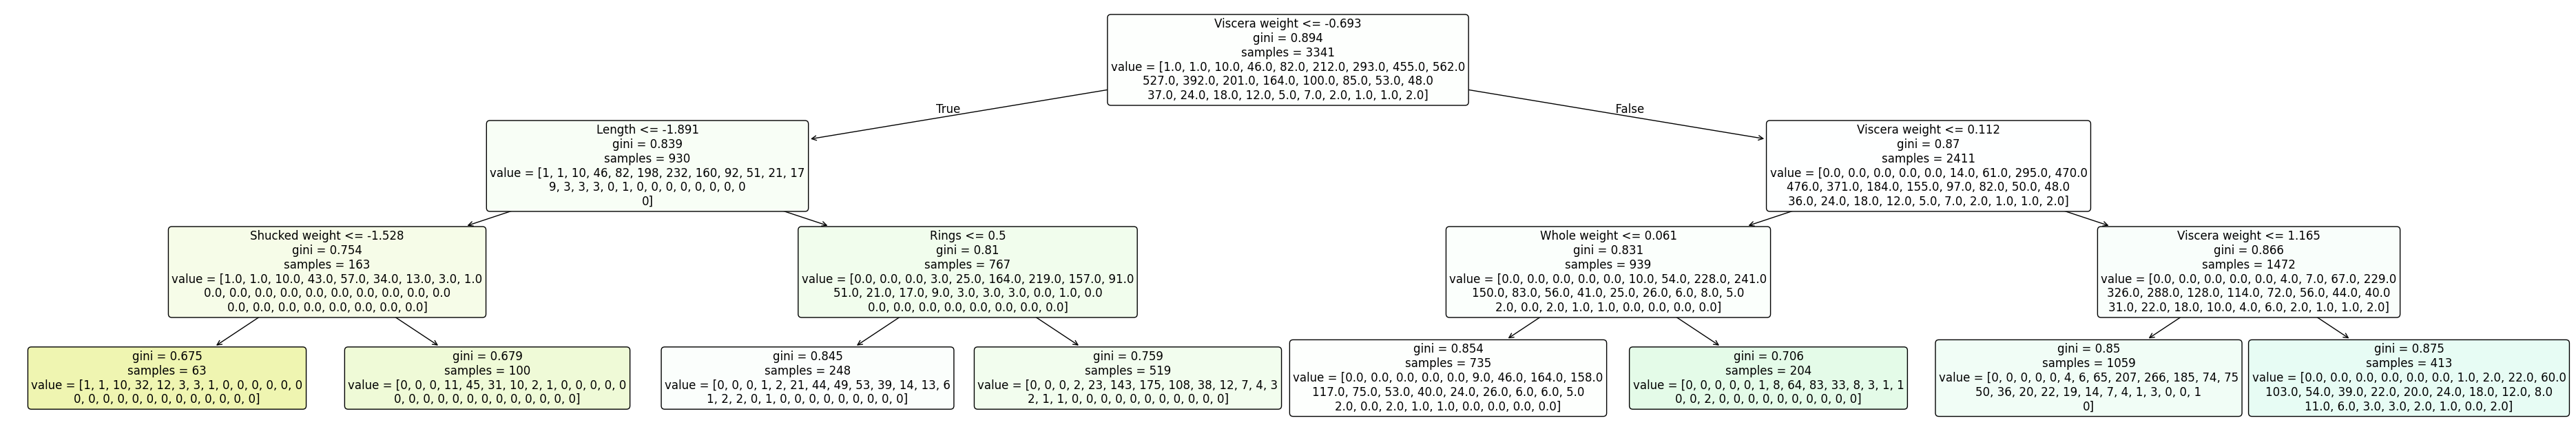

In [36]:
from sklearn import tree

#plt the figure, setting a black background
plt.figure(figsize=(48,8), facecolor ='w')

#create the tree plot
a = tree.plot_tree(clf['classifier'],
                   #use the feature names stored
                   feature_names = column_names,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()

# Finding the best parameters using GridSearchCV

In [37]:
X_train_new = preprocessor.fit_transform(X_train)

In [38]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9],
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:

    print()
    print(f"Tuning hyperparameters for {score}")
    print()

    clf_CV = GridSearchCV(DecisionTreeClassifier(),
                          tuned_parameters,
                          scoring = f'{score}_macro')

    clf_CV.fit(X_train_new, y_train)

    print("Best parameters:")
    print()
    print(clf_CV.best_params_)
    print()
    print("Grid scores:")
    means = clf_CV.cv_results_["mean_test_score"]
    stds = clf_CV.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf_CV.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_d

Best parameters:

{'max_depth': 5, 'min_samples_split': 2}

Grid scores:
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 2}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 4}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 6}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 8}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 10}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 2}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 4}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 6}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 8}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 10}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 2}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 4}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 6}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 8}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split'

Let us now create a new pipeline using the best features identified above.

In [39]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", DecisionTreeClassifier(
               max_depth =5, min_samples_split = 4, random_state = 42))]
)

In [41]:
clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.272


We observe an improvement in the model score!